# Function to create a Plot per Event

In [27]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
    
rink = hr.IIHFRink()

In [83]:

def distance_to_enemy_goal(X,Y,Team):
    
    
    rightGoal = [26.0,0.0]
    leftGoal = [-26.0, 0.0]
    
    if Team == 'Home':
        enemygoal = rightGoal
    
    if Team == 'Away':
        enemygoal = leftGoal
        
    return math.sqrt((enemygoal[0] - X)**2 + (enemygoal[1] - Y)**2)

def mean_distance_to_opponents(X,Y,Team, df: pd.DataFrame):
    
    
    distances_to_opponents = []
    main_player_team = ""
    opponent_team = ""
    
    if Team == 'Home':
        main_player_team = "Home"
        opponent_team = "Away"
    elif Team == 'Away':
        main_player_team = "Away"
        opponent_team = "Home"   
    else:
        print("Error: The team is neither home nor away.")
        
    for i in range(1, 12):

        coords_primary = [X,Y]
        float_coords_primary = [float(coord) for coord in coords_primary]
        
        if df[f'StartPlayerTeam{i}'] == opponent_team: 
            
            if type(df[f'StartPlayerCoordinates{i}']) == str:
                coords_opponent = df[f'StartPlayerCoordinates{i}'].split(',')

            elif type(df[f'StartPlayerCoordinates{i}']) == tuple:
                coords_opponent = df[f'StartPlayerCoordinates{i}']
                
            value = math.sqrt((float_coords_primary[0] - float(coords_opponent[0])) ** 2 + (float_coords_primary[1] - float(coords_opponent[1])) ** 2)
            distances_to_opponents.append(value)

    return sum(distances_to_opponents)/len(distances_to_opponents)


def plot_event(event):
    
    rightGoal = [26.0 * 3.2833,0.0]
    leftGoal = [-26.0 * 3.2833, 0.0]

    
    if event['EventPrimaryTeam'] == "Home":
        enemygoal = rightGoal
        Team = 'Home'
        goal_coords = pd.DataFrame({'x': [26.0 * 3.2833], 'y': [0 * 3.28]})
    
    elif event['EventPrimaryTeam'] == "Away":
        enemygoal = leftGoal
        Team = 'Away'
        goal_coords = pd.DataFrame({'x': [-26.0 * 3.2833], 'y': [0 * 3.28]})
        
    else:
        print("Error: The team is neither home nor away.")
    
    playerPos = [event['RinkX'], event['RinkY']]
    
    radius1 = mean_distance_to_opponents(playerPos[0],playerPos[1], Team, event)
    
    distancetogoal = distance_to_enemy_goal(playerPos[0],playerPos[1], Team)
    
    print(f'Distance to goal: {distancetogoal}')
    print(f'Mean distance to opponents: {radius1}')
    
    fig, ax = plt.subplots(figsize=(18, 8))
    # Hockeyfeld zeichnen
    rink.draw(ax=ax)
    
    # Formen zeichnen
    circle = plt.Circle((playerPos[0], playerPos[1]), radius1, color='purple', fill=False)
    ax.add_patch(circle)
    print('test')
    
    line = plt.Line2D((playerPos[0], playerPos[1]), (enemygoal[0], enemygoal[1]), color='red')
    print('test2')
    ax.add_line(line)
    
    
    # Aktuelle Zeile plotten
    sns.scatterplot(x='RinkX', y='RinkY', s=100, edgecolor='white', data=pd.DataFrame([event]), color='orange', ax=ax)
    sns.scatterplot(x='x', y='y', data=goal_coords, color='purple', s=100, legend=False, ax=ax)
    


    plt.show()

In [84]:

# Load Data
df = pd.read_csv('../data/CleanData/2_Drittel_988_1001.csv')

# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)
    
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])

    
# convert the x and y coordinates to the rink coordinates using the rink.convert method
# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY']*3.28)
    



In [85]:
passes = df[df['EventType'] == 'Pass']
df01 = passes.iloc[1]
#df01

playerPos = [df01['RinkX'], df01['RinkY']]
playerPos

[-73.87425, 45.264]

Distance to goal: 65.88454681533828
Mean distance to opponents: 66.23800263428731
test
test2


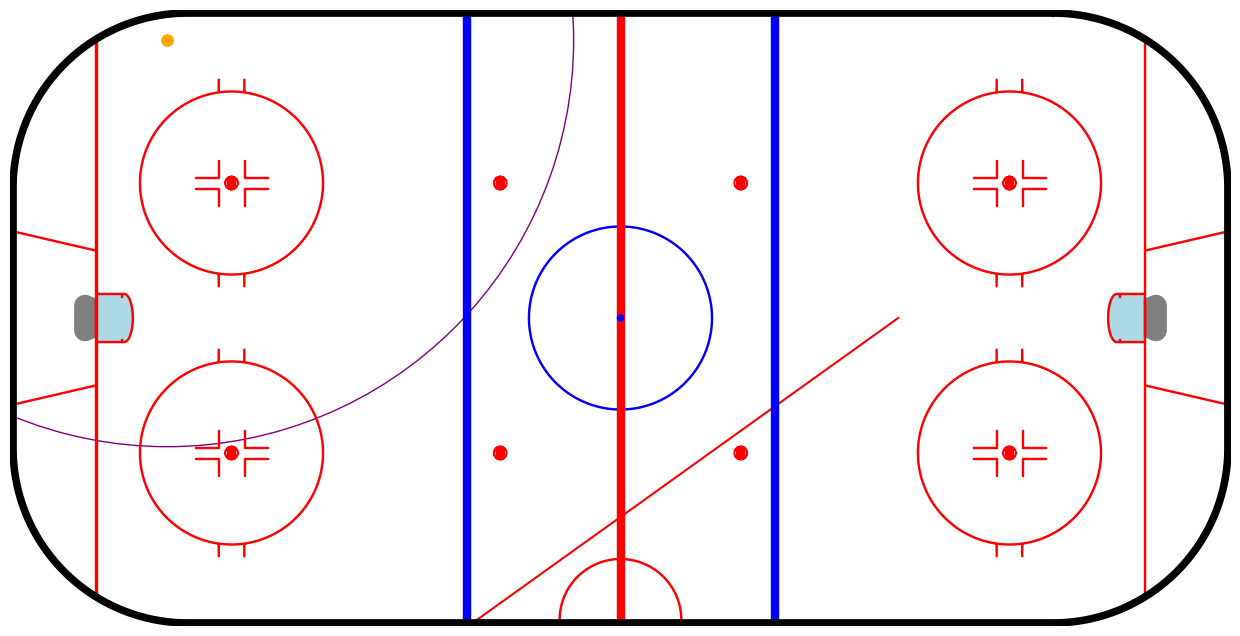

In [86]:
plot_event(df01)